# 3. Unsupervised Learning

* Clustering: finding groups of data (clusters) so that the samples within a cluster are more similar to each other than to the samples in the other clusters
* Anomaly detection: TODO

### Example: Clustering Sound Data with k-means

#### k-means:
* Partition data into $k$ clusters
* Iteratively move cluster _centroids_ to the mean of the samples that are closest to it
* Minimizes variances of the clusters

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from scipy.spatial.distance import euclidean as euclidean_distance
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')

In [6]:
df = pd.read_csv('data/dataset.csv', index_col=0)

@interact(n_iters=widgets.BoundedIntText(min=0, max=5))
def k_means(n_iters):
    initial_centroids = np.array([[4, 2], [1, 1]])
    if n_iters == 0:
        centroids = initial_centroids
        df.loc[:, 'cluster'] = df[['x1', 'x2']].apply(
            lambda x: np.argmin(
                [euclidean_distance(x, centroids[i, :]) for i in (0, 1)]
            ),
            axis=1
        )
    else:
        model = KMeans(n_clusters=2, init=initial_centroids, max_iter=n_iters)
        model.fit(df[['x1', 'x2']])
        centroids = model.cluster_centers_
        df.loc[:, 'cluster'] = model.predict(df[['x1', 'x2']])

    style = dict(s=300, c=[0, 1], marker='X', linewidth=1, edgecolor='k', cmap='winter')
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim([0, 4.5])
    ax.set_ylim([0, 5.5])
    df.plot.scatter('x1', 'x2', c='cluster', cmap=style['cmap'], ax=ax)
    ax.scatter(centroids[:, 0], centroids[:, 1], **style)

interactive(children=(BoundedIntText(value=0, description='n_iters', max=5), Output()), _dom_classes=('widget-interact',))

### Example: Anomaly Detection For Sound Data

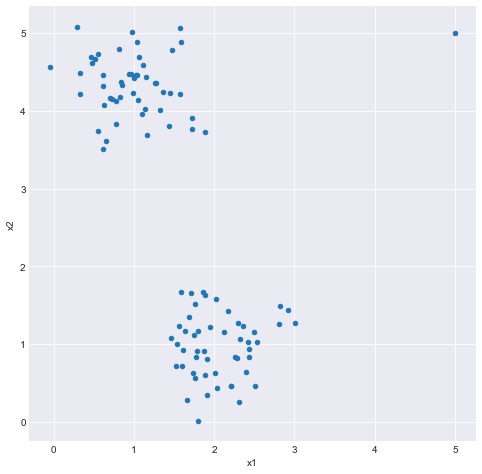

In [3]:
df = pd.concat([
    pd.read_csv('data/dataset.csv', index_col=0),
    pd.DataFrame([{'x1': 5, 'x2': 5, 'y': 0}])
])

df.plot.scatter('x1', 'x2', figsize=(8, 8));

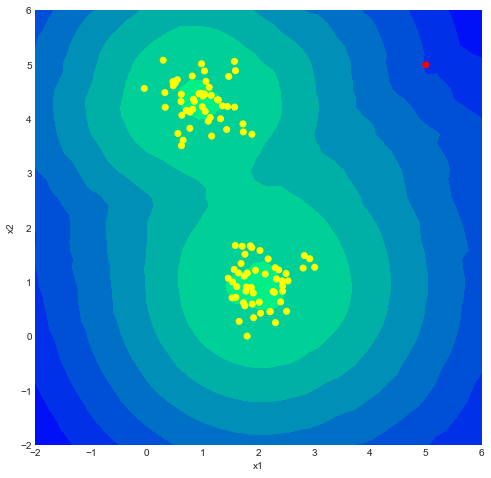

In [4]:
model = LocalOutlierFactor(n_neighbors=20, contamination=0.005)
df.loc[:, 'is_outlier'] = model.fit_predict(df[['x1', 'x2']])

limits = [-2, 6]
xx, yy = np.meshgrid(np.linspace(*limits, 50), np.linspace(*limits, 50))
Z = model._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(8, 8))
ax.contourf(xx, yy, Z, cmap='winter')
ax.scatter(df.x1, df.x2, c=df.is_outlier, cmap='autumn')
ax.set_xlabel('x1')
ax.set_ylabel('x2');